In [14]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
conn = sqlite3.connect('sales.db')  # Replace with your DB file
cursor = conn.cursor()

In [4]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    item TEXT,
    quantity INTEGER,
    price REAL
)
''')

In [5]:
sample_data = [
    ('Apple', 10, 0.50),
    ('Banana', 20, 0.30),
    ('Orange', 15, 0.60),
    ('Apple', 5, 0.50),
    ('Banana', 10, 0.30),
    ('Orange', 10, 0.60)
]

In [6]:
cursor.executemany('INSERT INTO sales (item, quantity, price) VALUES (?, ?, ?)', sample_data)
conn.commit()

In [9]:
cursor.execute("SELECT SUM(quantity), SUM(quantity * price) FROM sales")
total_quantity, total_revenue = cursor.fetchone()

In [10]:
print("=== Sales Summary ===")
print(f"Total Quantity Sold: {total_quantity}")
print(f"Total Revenue: ${total_revenue:.2f}")

=== Sales Summary ===
Total Quantity Sold: 70
Total Revenue: $31.50


In [11]:
cursor.execute("SELECT item, SUM(quantity), SUM(quantity * price) FROM sales GROUP BY item")
rows = cursor.fetchall()

In [17]:
df = pd.read_sql_query("SELECT * FROM sales", conn)

In [18]:
df

,id,item,quantity,price
0,1,Apple,10,0.5
1,2,Banana,20,0.3
2,3,Orange,15,0.6
3,4,Apple,5,0.5
4,5,Banana,10,0.3
5,6,Orange,10,0.6


In [22]:
items = [row[0] for row in rows]
revenues = [row[2] for row in rows]

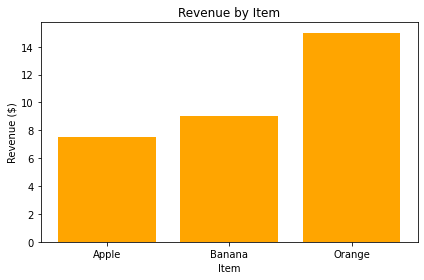

In [23]:

plt.bar(items, revenues, color='orange')
plt.xlabel('Item')
plt.ylabel('Revenue ($)')
plt.title('Revenue by Item')
plt.tight_layout()
plt.show()